In [1]:
import numpy as np
import scienceplots
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from structered_data import StructuredData
from confectionery import Confectionery
from cluster_half_shelfs_alpha import Half_shelf_cluster
from matplotlib import cm
from scipy.spatial.transform import Rotation as R
from scipy import ndimage



# Input Parameter

In [2]:
sigma=3
window_length=5
mean_filter=np.ones(window_length)/5
number_objs=1
rotation_trajectory_as_rotvec_path="data/Channel_31_10_2023_take_03_rotation_trajectory_as_rotvec"
destination_rotation_filtered_gauss_rotm="data/Channel_31_10_2023_take_03_rotation_trajectory_filtered_gauss_over_rotm"
destination_rotation_filtered_gauss_quat="data/Channel_31_10_2023_take_03_rotation_trajectory_filtered_gauss_over_quat"




In [3]:
start_frame=0
end_frame=100
display_index=0
rotation_trajectory_as_rotvec=[np.load(rotation_trajectory_as_rotvec_path+"_"+str(i)+".npy")for i in range(number_objs)]

rotation_trajectory_as_matrix=[R.from_rotvec(x).as_matrix() for x in rotation_trajectory_as_rotvec]
rotation_trajectory_as_flat_matrix=[x.reshape((x.shape[0],-1)) for x in rotation_trajectory_as_matrix]

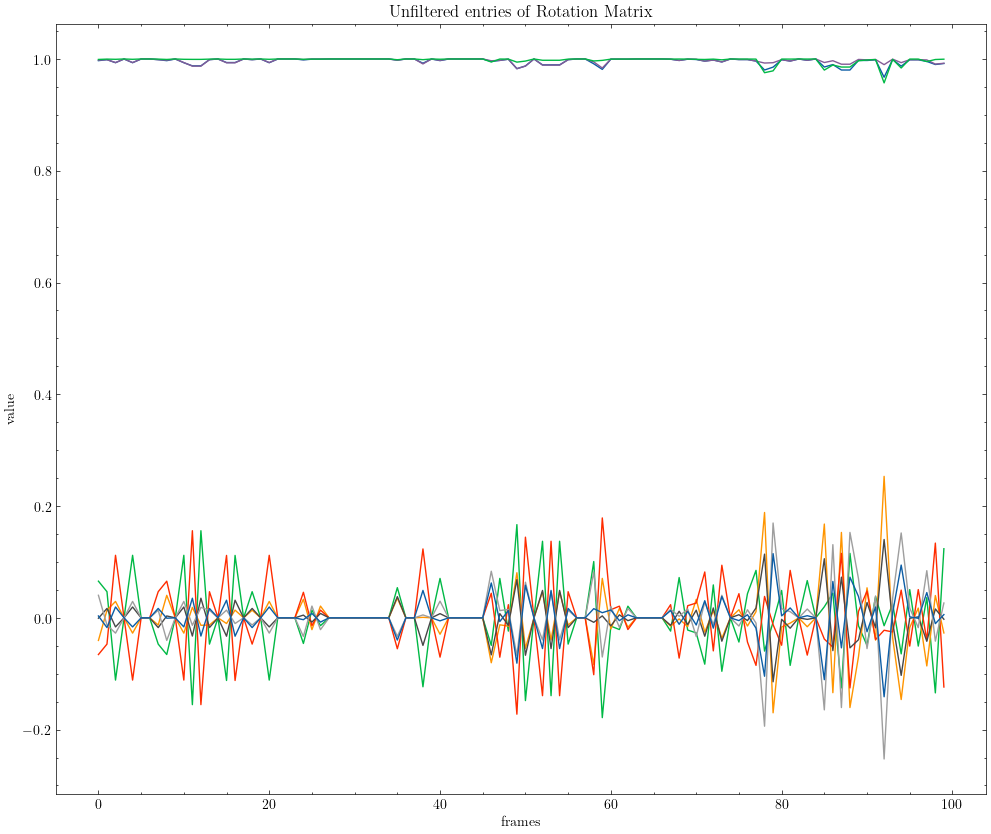

In [4]:
t=np.arange(start_frame,end_frame)
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [12, 10]
    fig, ax1 = plt.subplots(1,1)
    ax1.set_title("Unfiltered entries of Rotation Matrix")
    for i in range(9):
        ax1.plot(t,rotation_trajectory_as_flat_matrix[display_index][start_frame:end_frame,i])
    ax1.set_xlabel("frames")
    ax1.set_ylabel("value")
    plt.show()

In [5]:
rotation_trajectory_as_flat_matrix_filtered=[ndimage.convolve1d(x,mean_filter,axis=0,mode="nearest") for x in rotation_trajectory_as_flat_matrix]
rotation_trajectory_as_flat_matrix_gaussian_filtered=[ndimage.gaussian_filter1d(x,sigma,axis=0,mode="nearest") for x in rotation_trajectory_as_flat_matrix]



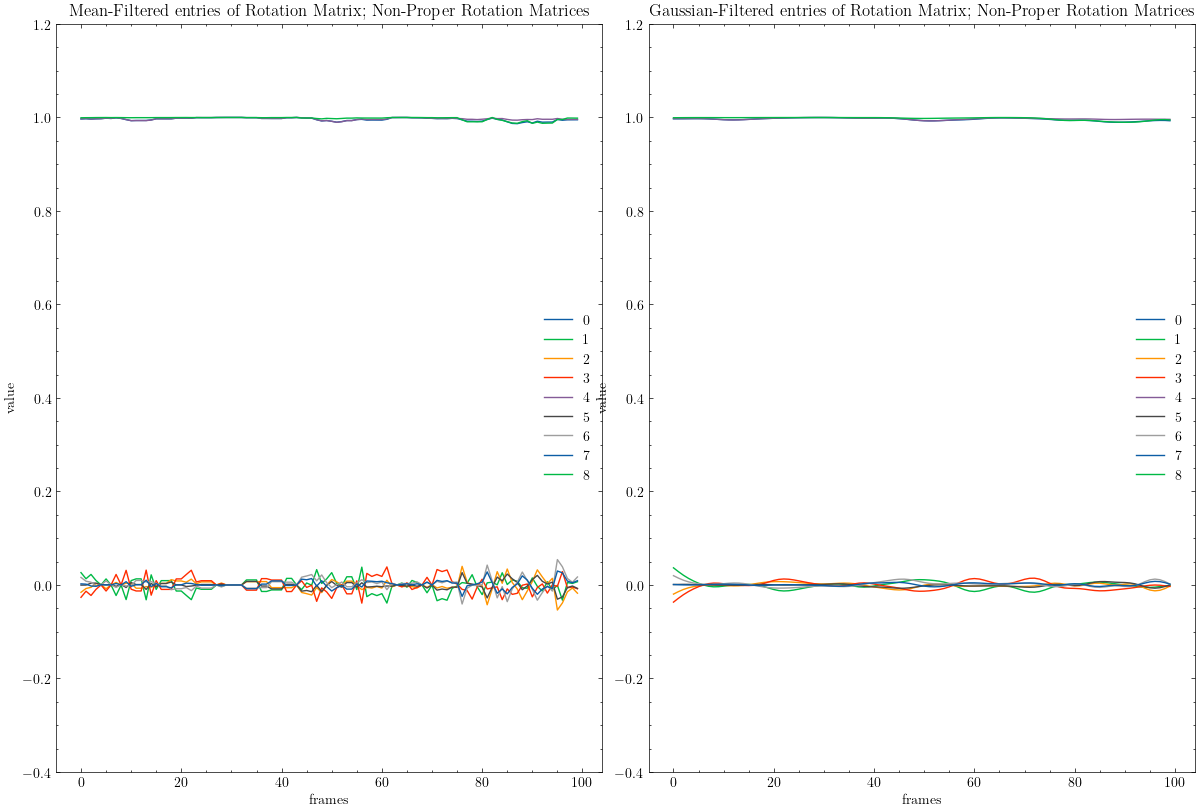

In [6]:
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [12, 8]
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.tight_layout()
    ax1.set_title("Mean-Filtered entries of Rotation Matrix; Non-Proper Rotation Matrices")
    for i in range(9):
        ax1.plot(t,rotation_trajectory_as_flat_matrix_filtered[display_index][start_frame:end_frame,i],label=str(i))
    ax1.set_xlabel("frames")
    ax1.set_ylabel("value")
    ax1.legend()
    ax2.set_title("Gaussian-Filtered entries of Rotation Matrix; Non-Proper Rotation Matrices")
    for i in range(9):
        ax2.plot(t,rotation_trajectory_as_flat_matrix_gaussian_filtered[display_index][start_frame:end_frame,i],label=str(i))
    ax2.set_xlabel("frames")
    ax2.set_ylabel("value")
    ax2.legend()
    ax1.set_ylim(-0.4, 1.2)
    ax2.set_ylim(-0.4, 1.2)
    plt.show()

In [7]:
rotation_trajectory_as_matrix_filtered=[x.reshape((-1,3,3)) for x in rotation_trajectory_as_flat_matrix_filtered]
rotation_trajectory_as_matrix_gaussian_filtered=[x.reshape((-1,3,3)) for x in rotation_trajectory_as_flat_matrix_gaussian_filtered]

In [8]:
A=rotation_trajectory_as_matrix_filtered[display_index][250,:,:]
B=rotation_trajectory_as_matrix_gaussian_filtered[display_index][250,:,:]
print(A.T@A)
print(B.T@B)

[[ 0.50679392 -0.02251622  0.01521147]
 [-0.02251622  0.90236706 -0.01645594]
 [ 0.01521147 -0.01645594  0.47125113]]
[[ 0.26898513 -0.00589915  0.00853765]
 [-0.00589915  0.91410605 -0.01997907]
 [ 0.00853765 -0.01997907  0.24126029]]


# change matrices to proper rotation matrix with svd

In [9]:
def nearest_projection(x):
    y=np.linalg.svd(x)
    y=y[0]@y[2]
    return y
rotation_trajectory_as_matrix_filtered=[nearest_projection(x) for x in rotation_trajectory_as_matrix_filtered]
rotation_trajectory_as_matrix_gaussian_filtered=[nearest_projection(x) for x in rotation_trajectory_as_matrix_gaussian_filtered]


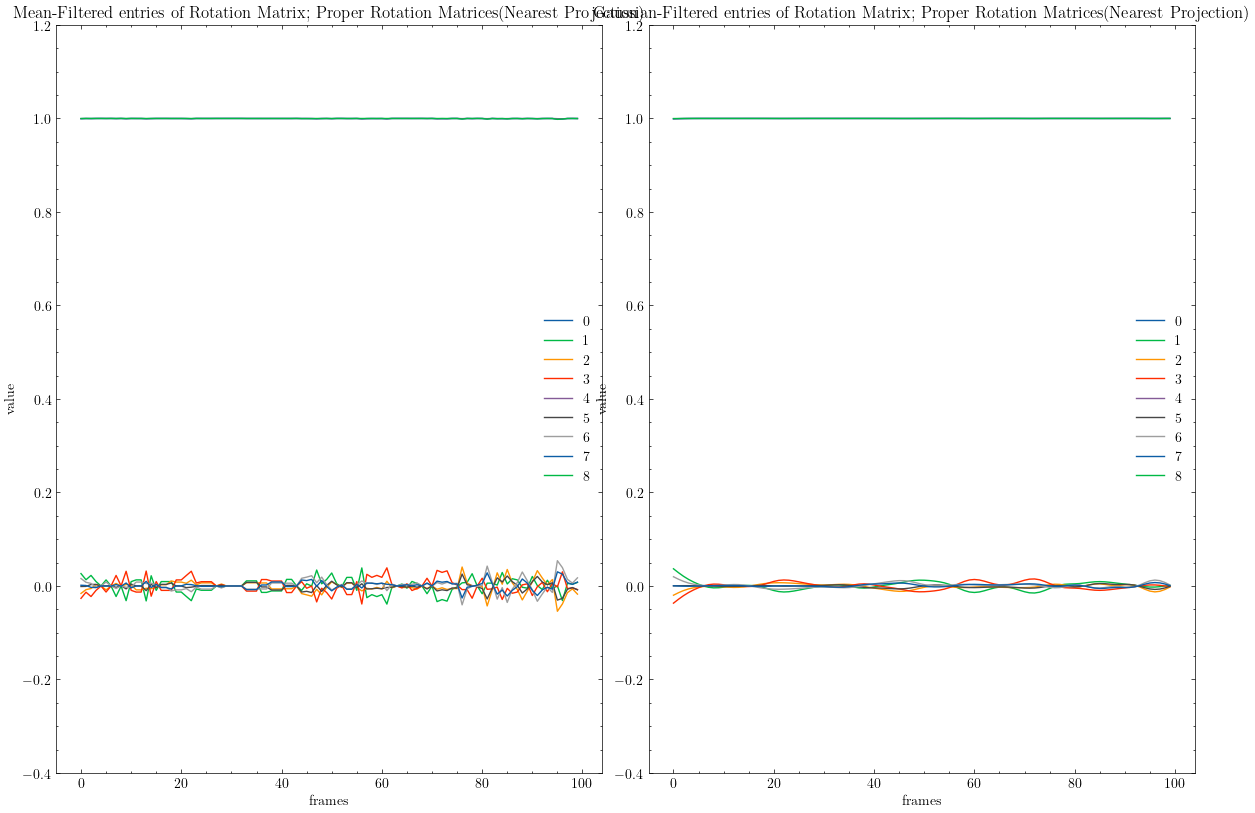

In [10]:
rotation_trajectory_as_flat_matrix_filtered=[x.reshape((-1,9)) for x in rotation_trajectory_as_matrix_filtered]
rotation_trajectory_as_flat_matrix_gaussian_filtered=[x.reshape((-1,9)) for x in rotation_trajectory_as_matrix_gaussian_filtered]

with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [12, 8]
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.tight_layout()
    ax1.set_title("Mean-Filtered entries of Rotation Matrix; Proper Rotation Matrices(Nearest Projection)")
    for i in range(9):
        ax1.plot(t,rotation_trajectory_as_flat_matrix_filtered[display_index][start_frame:end_frame,i],label=str(i))
    ax1.set_xlabel("frames")
    ax1.set_ylabel("value")
    ax1.legend()
    ax2.set_title("Gaussian-Filtered entries of Rotation Matrix; Proper Rotation Matrices(Nearest Projection)")
    for i in range(9):
        ax2.plot(t,rotation_trajectory_as_flat_matrix_gaussian_filtered[display_index][start_frame:end_frame,i],label=str(i))
    ax2.set_xlabel("frames")
    ax2.set_ylabel("value")
    ax2.legend()
    ax1.set_ylim(-0.4, 1.2)
    ax2.set_ylim(-0.4, 1.2)
    plt.show()

In [11]:
A=rotation_trajectory_as_flat_matrix_filtered[display_index][250,:].reshape((3,3))
B=rotation_trajectory_as_flat_matrix_gaussian_filtered[display_index][250,:].reshape((3,3))
print(A.T@A)
print(B.T@B)

[[ 1.00000000e+00 -7.70952861e-18  3.59967049e-16]
 [-7.70952861e-18  1.00000000e+00 -7.95469659e-17]
 [ 3.59967049e-16 -7.95469659e-17  1.00000000e+00]]
[[ 1.00000000e+00  2.01314400e-18 -4.54509849e-17]
 [ 2.01314400e-18  1.00000000e+00  2.00117408e-16]
 [-4.54509849e-17  2.00117408e-16  1.00000000e+00]]


# Do Interpolation over quaternion space

In [12]:
rotation_trajectory_as_quat=[R.from_rotvec(x).as_quat() for x in rotation_trajectory_as_rotvec]


# ensure qk*qd<0, since quaternion double cover SO(3) all k

In [13]:
qd=np.array([[0,0,0,1]])
for i in range(number_objs):
    A=np.sum(rotation_trajectory_as_quat[i]*qd,axis=1)
    index=np.arange(A.size)[A<0]
    print(index)
    if index.size % 2==1:
        index=np.append(index,rotation_trajectory_as_quat[i].shape[0])
    for j,ind in enumerate(index[::2]):
        rotation_trajectory_as_quat[i][ind:index[2*j+1],:]=-rotation_trajectory_as_quat[ind:index[2*j+1],:]
    A=np.sum(rotation_trajectory_as_quat[i]*qd,axis=1)
    print(np.arange(1,A.size+1)[A<0])



[]
[]


# smooth quaternion

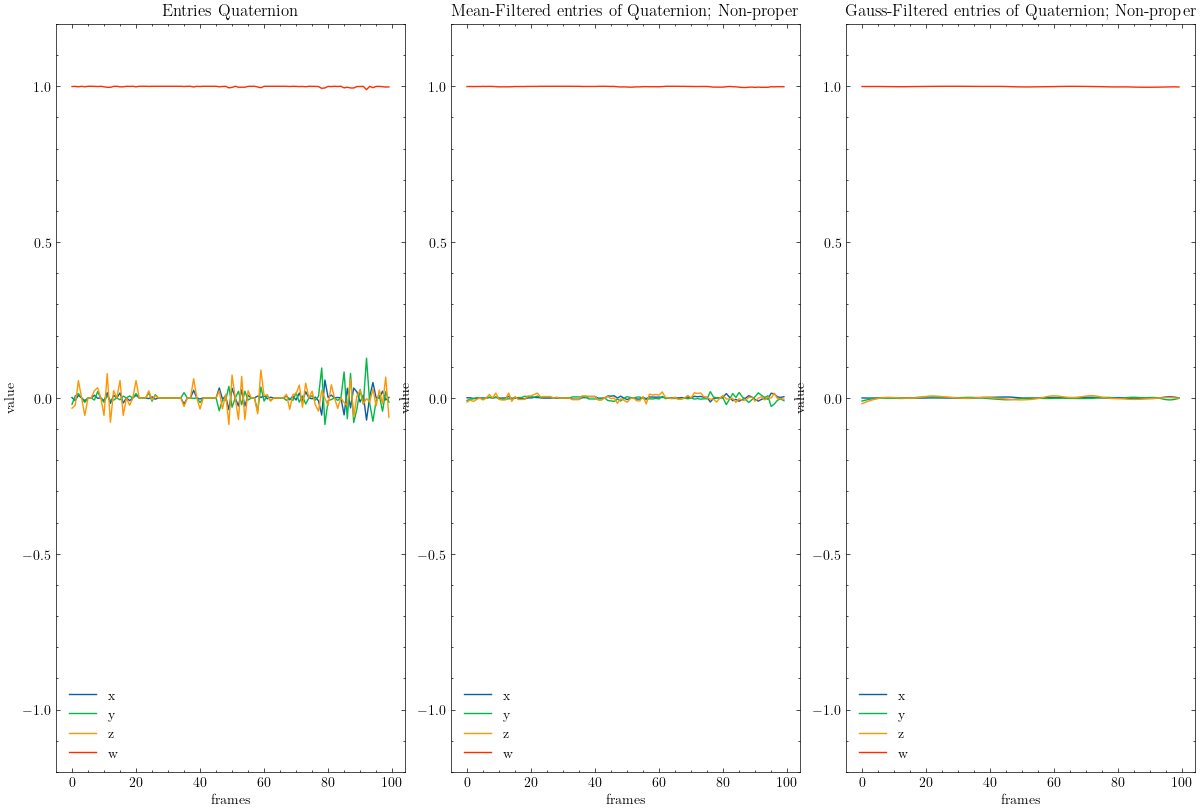

In [14]:
rotation_trajectory_as_quat_filtered=[ndimage.convolve1d(x,mean_filter,axis=0,mode="nearest") for x in rotation_trajectory_as_quat]
rotation_trajectory_as_quat_filtered_gauss=[ndimage.gaussian_filter1d(x,sigma,axis=0,mode="nearest") for x in rotation_trajectory_as_quat]

quat_map=["x","y","z","w"]
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [12, 8]
    fig, (ax1,ax2,ax3) = plt.subplots(1,3)
    fig.tight_layout()
    ax1.set_title("Entries Quaternion")
    for i in range(4):
        ax1.plot(t,rotation_trajectory_as_quat[display_index][start_frame:end_frame,i],label=quat_map[i])
    ax1.set_xlabel("frames")
    ax1.set_ylabel("value")
    ax1.legend()
    ax2.set_title("Mean-Filtered entries of Quaternion; Non-proper")
    for i in range(4):
        ax2.plot(t,rotation_trajectory_as_quat_filtered[display_index][start_frame:end_frame,i],label=quat_map[i])
    ax2.set_xlabel("frames")
    ax2.set_ylabel("value")
    ax2.legend()
    ax3.set_title("Gauss-Filtered entries of Quaternion; Non-proper")
    for i in range(4):
        ax3.plot(t,rotation_trajectory_as_quat_filtered_gauss[display_index][start_frame:end_frame,i],label=quat_map[i])
    ax3.set_xlabel("frames")
    ax3.set_ylabel("value")
    ax3.legend()
    ax1.set_ylim(-1.2, 1.2)
    ax2.set_ylim(-1.2, 1.2)
    ax3.set_ylim(-1.2, 1.2)
    plt.show()


# normalize quaternion to make them proper

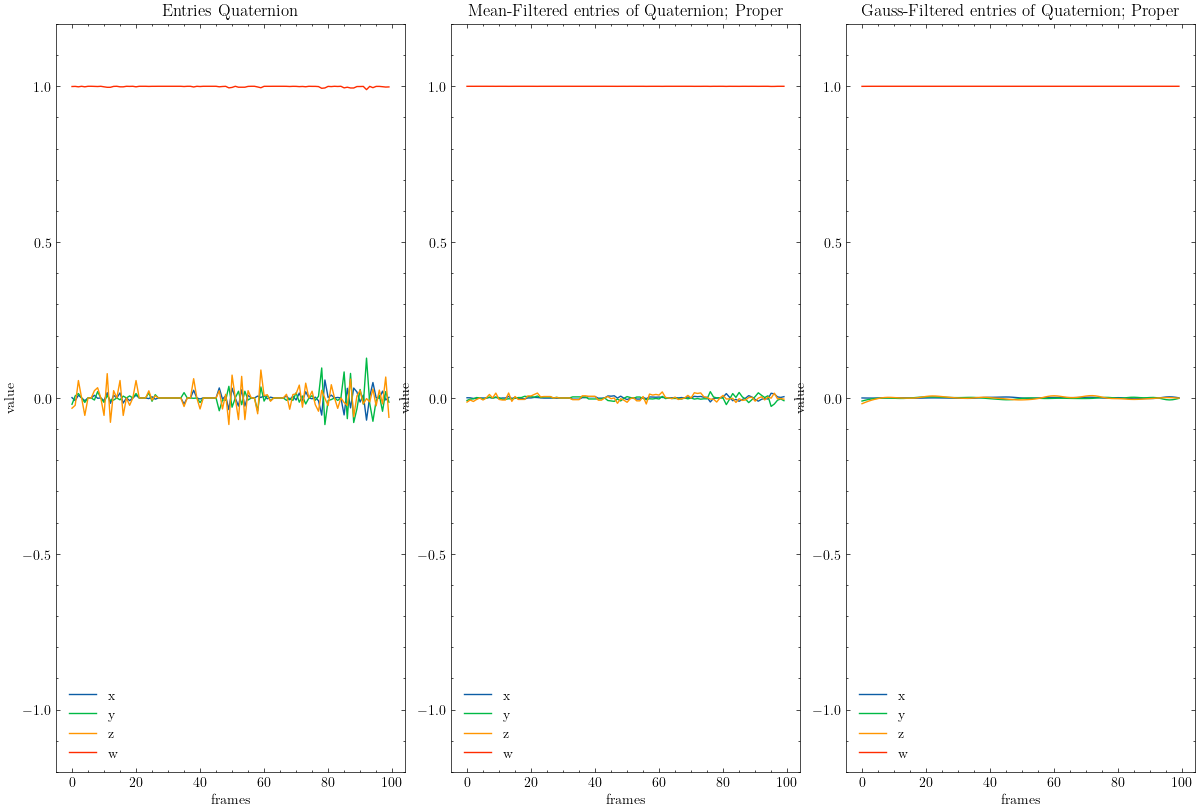

In [15]:
rotation_trajectory_as_quat_filtered=[x/np.linalg.norm(x,axis=1).reshape((-1,1)) for x in rotation_trajectory_as_quat_filtered]
rotation_trajectory_as_quat_filtered_gauss=[x/np.linalg.norm(x,axis=1).reshape((-1,1)) for x in rotation_trajectory_as_quat_filtered_gauss]

with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [12, 8]
    fig, (ax1,ax2,ax3) = plt.subplots(1,3)
    fig.tight_layout()
    ax1.set_title("Entries Quaternion")
    for i in range(4):
        ax1.plot(t,rotation_trajectory_as_quat[display_index][start_frame:end_frame,i],label=quat_map[i])
    ax1.set_xlabel("frames")
    ax1.set_ylabel("value")
    ax1.legend()
    ax2.set_title("Mean-Filtered entries of Quaternion; Proper")
    for i in range(4):
        ax2.plot(t,rotation_trajectory_as_quat_filtered[display_index][start_frame:end_frame,i],label=quat_map[i])
    ax2.set_xlabel("frames")
    ax2.set_ylabel("value")
    ax2.legend()
    ax3.set_title("Gauss-Filtered entries of Quaternion; Proper")
    for i in range(4):
        ax3.plot(t,rotation_trajectory_as_quat_filtered_gauss[display_index][start_frame:end_frame,i],label=quat_map[i])
    ax3.set_xlabel("frames")
    ax3.set_ylabel("value")
    ax3.legend()
    ax1.set_ylim(-1.2, 1.2)
    ax2.set_ylim(-1.2, 1.2)
    ax3.set_ylim(-1.2, 1.2)
    plt.show()

# Show in Axis Angle

In [16]:
rotation_trajectory_as_matrix_filtered=[x.reshape((-1,3,3)) for x in rotation_trajectory_as_flat_matrix_filtered]
rotation_trajectory_as_flat_matrix_gaussian_filtered=[x.reshape((-1,3,3)) for x in rotation_trajectory_as_flat_matrix_gaussian_filtered]

mean_filter_matrix=[R.from_matrix(x).as_rotvec() for x in rotation_trajectory_as_matrix_filtered]
gauss_filter_matrix=[R.from_matrix(x).as_rotvec() for x in rotation_trajectory_as_flat_matrix_gaussian_filtered]

mean_filter_quat=[R.from_quat(x).as_rotvec() for x in rotation_trajectory_as_quat_filtered]
gauss_filter_quat=[R.from_quat(x).as_rotvec() for x in rotation_trajectory_as_quat_filtered_gauss]


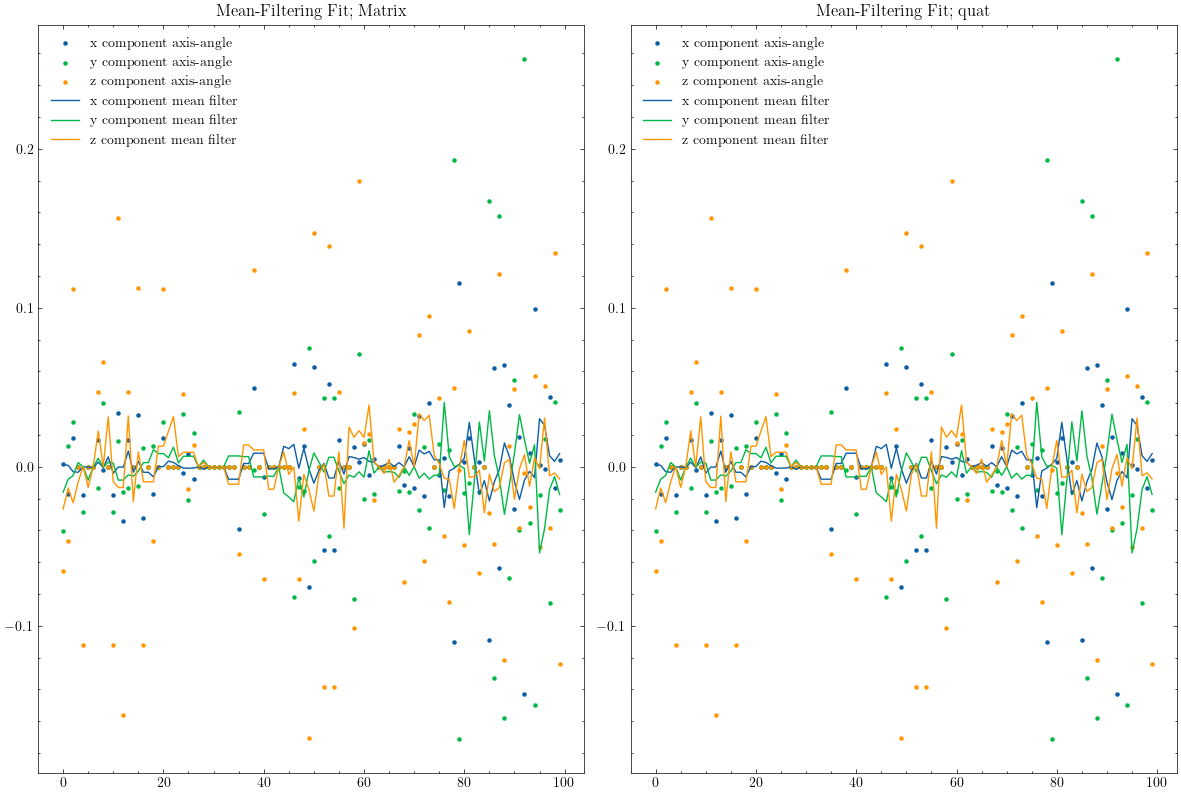

In [17]:
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [12, 8]
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.tight_layout()
    ax1.set_title("Mean-Filtering Fit; Matrix")
    ax1.scatter(t,rotation_trajectory_as_rotvec[display_index][start_frame:end_frame,0],label="x component axis-angle",s=5)
    ax1.scatter(t,rotation_trajectory_as_rotvec[display_index][start_frame:end_frame,1],label="y component axis-angle",s=5)
    ax1.scatter(t,rotation_trajectory_as_rotvec[display_index][start_frame:end_frame,2],label="z component axis-angle",s=5)
    ax1.plot(t,mean_filter_matrix[display_index][start_frame:end_frame,0],label="x component mean filter")
    ax1.plot(t,mean_filter_matrix[display_index][start_frame:end_frame,1],label="y component mean filter")
    ax1.plot(t,mean_filter_matrix[display_index][start_frame:end_frame,2],label="z component mean filter")
    ax1.legend()
    ax2.set_title("Mean-Filtering Fit; quat")
    ax2.scatter(t,rotation_trajectory_as_rotvec[display_index][start_frame:end_frame,0],label="x component axis-angle",s=5)
    ax2.scatter(t,rotation_trajectory_as_rotvec[display_index][start_frame:end_frame,1],label="y component axis-angle",s=5)
    ax2.scatter(t,rotation_trajectory_as_rotvec[display_index][start_frame:end_frame,2],label="z component axis-angle",s=5)
    ax2.plot(t,mean_filter_quat[display_index][start_frame:end_frame,0],label="x component mean filter")
    ax2.plot(t,mean_filter_quat[display_index][start_frame:end_frame,1],label="y component mean filter")
    ax2.plot(t,mean_filter_quat[display_index][start_frame:end_frame,2],label="z component mean filter")
    ax2.legend()
    plt.show()

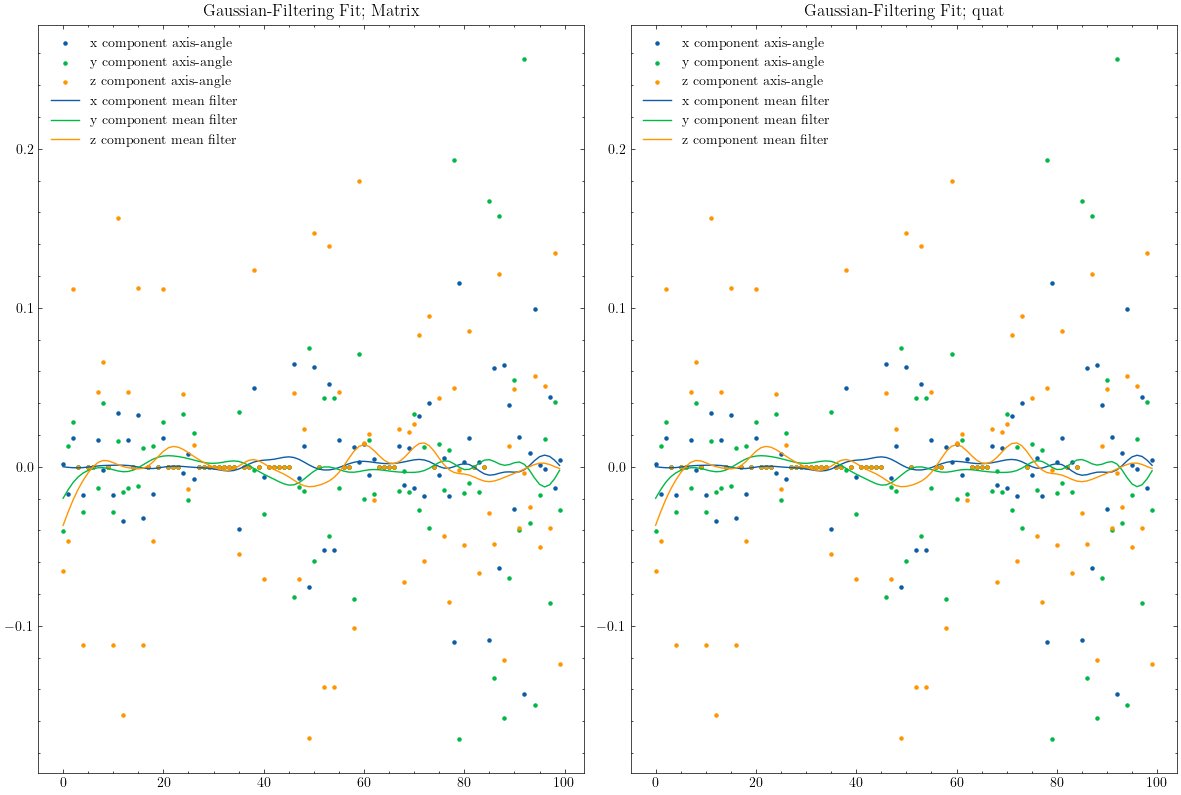

In [18]:
with plt.style.context('science'):
    plt.rcParams['figure.figsize'] = [12, 8]
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.tight_layout()
    ax1.set_title("Gaussian-Filtering Fit; Matrix")
    ax1.scatter(t,rotation_trajectory_as_rotvec[display_index][start_frame:end_frame,0],label="x component axis-angle",s=5)
    ax1.scatter(t,rotation_trajectory_as_rotvec[display_index][start_frame:end_frame,1],label="y component axis-angle",s=5)
    ax1.scatter(t,rotation_trajectory_as_rotvec[display_index][start_frame:end_frame,2],label="z component axis-angle",s=5)
    ax1.plot(t,gauss_filter_matrix[display_index][start_frame:end_frame,0],label="x component mean filter")
    ax1.plot(t,gauss_filter_matrix[display_index][start_frame:end_frame,1],label="y component mean filter")
    ax1.plot(t,gauss_filter_matrix[display_index][start_frame:end_frame,2],label="z component mean filter")
    ax1.legend()
    ax2.set_title("Gaussian-Filtering Fit; quat")
    ax2.scatter(t,rotation_trajectory_as_rotvec[display_index][start_frame:end_frame,0],label="x component axis-angle",s=5)
    ax2.scatter(t,rotation_trajectory_as_rotvec[display_index][start_frame:end_frame,1],label="y component axis-angle",s=5)
    ax2.scatter(t,rotation_trajectory_as_rotvec[display_index][start_frame:end_frame,2],label="z component axis-angle",s=5)
    ax2.plot(t,gauss_filter_quat[display_index][start_frame:end_frame,0],label="x component mean filter")
    ax2.plot(t,gauss_filter_quat[display_index][start_frame:end_frame,1],label="y component mean filter")
    ax2.plot(t,gauss_filter_quat[display_index][start_frame:end_frame,2],label="z component mean filter")
    ax2.legend()
    plt.show()

# safe trajectories

In [19]:
for i in range(number_objs):
    np.save(destination_rotation_filtered_gauss_rotm+"_"+str(i)+".npy",gauss_filter_matrix[i])
    np.save(destination_rotation_filtered_gauss_quat+"_"+str(i)+".npy",gauss_filter_quat[i])

In [21]:
print(gauss_filter_matrix[1].shape)
print(rotation_trajectory_as_rotvec[1].shape)
print(np.linalg.norm(gauss_filter_matrix[0]-rotation_trajectory_as_rotvec[0]))
print(np.linalg.norm(gauss_filter_matrix[1]-rotation_trajectory_as_rotvec[1]))
print(np.linalg.norm(gauss_filter_matrix[2]-rotation_trajectory_as_rotvec[2]))

(422, 3)
(422, 3)
15.93296298855099


IndexError: list index out of range

In [ ]:
print(gauss_filter_matrix[1][0:10,-1])
print(rotation_trajectory_as_rotvec[1][0:10,2])

